# syn data

In [661]:
from ctgan import CTGAN
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sdmetrics.reports.single_table import QualityReport


In [662]:
df = pd.read_csv('Data for python.csv', sep=';', header=1, index_col=0, decimal=',')
df = df.fillna(0)
df = df.drop(columns=['Id'])
df = df.drop(columns=['ScandcleftID'])
df = df.drop(columns=['Født'])
df = df.drop(columns=['Materialedato A'])
df = df.drop(columns=['Materialedato B'])
df = df.drop(columns=['Materialedato C'])
df = df.drop(columns=['Total Row Score A'])
df = df.drop(columns=['Total Row Score B'])
df = df.drop(columns=['Total Row Score C'])
df = df.drop(columns=['Goslon Score A'])
df = df.drop(columns=['Goslon Score B'])
df = df.drop(columns=['Goslon Score C'])

In [663]:
A = df[["Anteroposterior 1",
          'Anteroposterior 2',
          'Vertical 1',
          'Vertical 2',
          'Transverse',
          "Crowding ",
          'Spacing',
          "Tooth shape/size\r\n",
          "Pan 2\r\n",
          ]]
B = df[['Anteroposterior 1.1',
          'Anteroposterior',
          'Vertical 1.1',
          'Vertical 2.1',
          'Transverse.1',
          'Crowding .1',
          'Spacing.1',
          'Tooth shape/size\r\n.1',
          'Pan 2\r\n.1',]]


In [664]:
ctgan_A = CTGAN(epochs=5)
ctgan_A.fit(A, A.columns)

ctgan_B = CTGAN(epochs=75)
ctgan_B.fit(B, B.columns)

syn_A= ctgan_A.sample(1500)
syn_B= ctgan_B.sample(20)

In [665]:
ctgan = CTGAN(epochs=50,verbose=True,log_frequency=False)
ctgan.fit(df, df.columns)

syn = ctgan.sample(25000)


Gen. (-0.77) | Discrim. (0.21): 100%|██████████| 50/50 [00:04<00:00, 10.95it/s] 


In [666]:
from sdv.metrics.tabular import LogisticDetection, SVCDetection


LogisticDetection.compute(df, syn)

0.74852299189511

In [667]:
def tis(row):
    x = syn["Anteroposterior 1"]+syn["Anteroposterior 2"]+syn["Vertical 1"]+syn["Vertical 2"]+syn["Transverse"]+syn["Crowding "]+syn["Spacing"]+syn["Tooth shape/size\r\n"]+syn["Pan 2\r\n"]
    y = syn["Anteroposterior 1.1"]+syn["Anteroposterior"]+syn["Vertical 1.1"]+syn["Vertical 2.1"]+syn["Transverse.1"]+syn["Crowding .1"]+syn["Spacing.1"]+syn["Tooth shape/size\r\n.1"]+syn["Pan 2\r\n.1"]
    z = syn["Anteroposterior 1.2"]+syn["Anteroposterior 2.1"]+syn["Vertical 1.2"]+syn["Vertical 2.2"]+syn["Transverse.2"]+syn["Crowding .2"]+syn["Spacing.2"]+syn["Tooth shape/size\r\n.2"]+syn["Pan 2\r\n.2"]
    return x,y, z

In [668]:
def total_row_score_A(row):
    x =  syn_A["Anteroposterior 1"]+syn_A["Anteroposterior 2"]+syn_A["Vertical 1"]+syn_A["Vertical 2"]+syn_A["Transverse"]+syn_A["Crowding "]+syn_A["Spacing"]+syn_A["Tooth shape/size\r\n"]+syn_A["Pan 2\r\n"]
    return x

In [669]:
def Total_row_score_B(row):
    y = syn_B["Anteroposterior 1.1"]+syn_B["Anteroposterior 2.1"]+syn_B["Vertical 1.1"]+syn_B["Vertical 2.1"]+syn_B["Transverse.1"]+syn_B["Crowding .1"]+syn_B["Spacing.1"]+syn_B["Tooth shape/size\r\n.1"]+syn_B["Pan 2\r\n.1"]
    return y

In [670]:
tA ,tb ,tC= tis(syn)
syn["Total Row Score A"] = tA
syn["Total Row Score B"] = tb
syn["Total Row Score C"] = tC

In [683]:
syn = syn.drop(syn[(syn['Total Row Score C'] > syn['Total Row Score B'] ) | (syn['Total Row Score B'] > syn["Total Row Score A"])].index)
print(syn['Pan 2\r\n.1'])

0        0.0
2        4.0
3        4.0
6        3.0
7        4.0
        ... 
24988    4.0
24994    3.0
24995    0.0
24996    4.0
24998    3.0
Name: Pan 2\r\n.1, Length: 17810, dtype: float64


In [672]:
syn.to_csv('synthetic_data.csv', index=True)

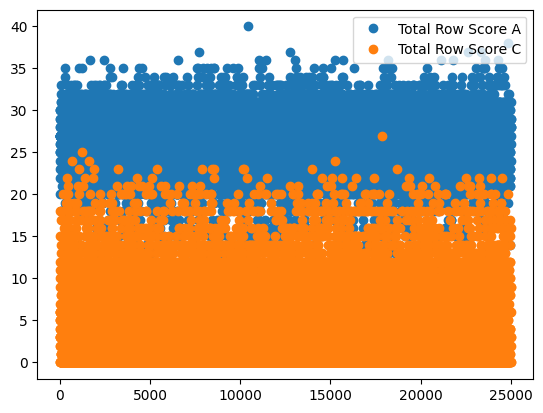

In [673]:
plt.plot(syn['Total Row Score A'], "o", label="Total Row Score A")
plt.plot(syn['Total Row Score C'], "o", label="Total Row Score C")
plt.legend( loc='upper right')
